# **Predicting and Optimizing Fitness Club Attendance: A Machine Learning Approach**

## **I. Introduction**
### **1. About Data** 
- GoalZone is a Canadian fitness club chain that provides various fitness classes in two sizes: 25 and 15. 
- Certain classes are consistently fully booked, but they often experience low attendance rates. 
- To address this issue, GoalZone aims to expand the number of available spots for classes. They plan to achieve this by predicting whether a member will attend a class or not. 
- By accurately predicting non-attendance, GoalZone can free up space and make it available for other members.

***

The dataset for this analysis includes information about:
- **booking ID**: The unique identifier of the booking.
- **month_as_member**: The number of months as this fitness club member, minimum 1 month.
- **weight**: The member's weight in kg, rounded to 2 decimal places.
- **days_before**: The number of days before the class the member registered
- **day_of_week**: The day of the week of the class.
- **time**: The time of day of the class. Either AM or PM
- **category**: The category of the fitness class.
- **attended**: Whether the member attended the class (1) or not (0).

### **2. Project Purposes**
For a Fitness Club, besides booking numbers, the average registration to attendance rate takes an important role in achieving the set profit target. By predicting whether or not a member will attend the class after booking, the club can decide when to close the form of booking and who are the loyal members to give incentives. In that way, they will reach the expected capacity for each class, make the most of available resources for efficiency and retain regular members.

Accordingly, we choose GoalZ Fitness Club in order to:

- Analyze the Attendance Rate  
- Point out the relationship between attendance and different factors (including months of being a member, weight, day of class and booking lead time before the class) 
- Make an ML model to predict the possibilities of joining after registration.

## **II. Data Processing**
### **1. Import Libraries**

In [1]:
%pip install pandas numpy matplotlib seaborn sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### **2. Reading Dataset**

In [2]:
fitnessclub = pd.read_csv('fitness_club.csv') 
fitnessclub.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [3]:
fitnessclub.shape

(1500, 8)

In [4]:
fitnessclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


DATA SUMMARY:
- The DataFrame contains a total of **1500 rows and 8 columns**, representing various attributes
- The DataFrame contains a mix of **integer,** **float**, and **object** data types
- Some columns needed further preprocessing to handle missing values and convert object data to more suitable types for analysis. 

### **3. Data Cleaning**

In [5]:
fitnessclub.rename({'category': 'sport_type' }, 
          axis = "columns", inplace = True) 

In [6]:
fitnessclub.months_as_member.unique()

array([ 17,  10,  16,   5,  15,   7,  11,   9,  23,  13,   8,  22,   6,
        33,  24,  14,   2,  12,  26,  28,  27,   1,   3,  21,  18,  19,
        53,  20,  34,  25,  32,  73,  55,   4,  35,  54,  76,  62,  42,
       105,  90,  29,  60,  30, 107,  52,  37,  38,  48,  51,  40,  89,
        57,  36,  44,  39,  41,  47,  58,  66,  45,  43,  61,  50,  65,
        31,  97,  59,  93, 148, 111,  69], dtype=int64)

In [7]:
fitnessclub.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

- Most of the data about days_about is integer type. However, there are still some object type; therefore, we need to convert these into int type


In [8]:
fitnessclub['days_before'] = fitnessclub['days_before'].str.replace(' days', '').astype(int)


In [9]:
fitnessclub['days_before'].value_counts().index.sort_values()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 29], dtype='int32', name='days_before')

- The column is ready to process (with int type value)

In [10]:
fitnessclub.day_of_week.unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [11]:
fitnessclub['day_of_week'] = fitnessclub['day_of_week'].str[:3]
day_mapping = {'Mon': 0,'Tue': 1,'Wed': 2,'Thu': 3,'Fri': 4,'Sat': 5,'Sun': 6}
fitnessclub['day_of_week'] = fitnessclub['day_of_week'].map(day_mapping)


In [12]:
fitnessclub.day_of_week.unique()

array([2, 0, 6, 4, 3, 1, 5], dtype=int64)

The data about day of week on which members come to the fitness club is converted into int type, being ready to process

In [13]:
fitnessclub.time.unique()


array(['PM', 'AM'], dtype=object)

In [14]:
fitnessclub.sport_type.unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [15]:
fitnessclub['sport_type']=fitnessclub['sport_type'].replace('-', 'unknown')

In [16]:
fitnessclub.sport_type.value_counts() 

sport_type
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: count, dtype: int64

In [17]:
fitnessclub.attended.value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

- The number of fitness club members which are absent although booking before approximately doubled that of attendees => Need to check the reasons for this situation and recommend for the club (main purpose of this project)

In [18]:
fitnessclub.weight.sort_values()

142     55.41
138     57.83
150     58.13
738     58.24
933     58.42
        ...  
1119      NaN
1266      NaN
1336      NaN
1363      NaN
1416      NaN
Name: weight, Length: 1500, dtype: float64

In [19]:
fitnessclub.isnull().sum() #Count for missing value

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
sport_type           0
attended             0
dtype: int64

- The column of weight has 20 missing values that need to be fixed. We choose to impute the average value of members' weight

In [20]:
fitnessclub['weight']= fitnessclub['weight'].fillna(fitnessclub['weight'].mean())

In [21]:
## Check the data again after filling the missing value
fitnessclub.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
sport_type          0
attended            0
dtype: int64

In [22]:
#Duplication Checking
fitnessclub.duplicated().sum()

0

In [23]:
#Final data checking after cleaning
fitnessclub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   int64  
 5   time              1500 non-null   object 
 6   sport_type        1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 88.0+ KB


#### **Details about the data after cleaning:**
- **months_as_member**, **time**, **attended**: matches the description.
- **days_before**: This include 'days' mentioned along with numbers resulting it as Object type instead of mentioned one for Numeric. We fixed the data by convert the day of with into [0,1,2,3,4,5,6]
- **day_of_week**: day of week is object type, not as Numeric mentioned in description. Further, few anomalies were found. We corrected that & changed it to Numeric.
- **category** : Category had value as ** "-"**, which was replaced with "**Unknown**".
- **weight** : This had **20 missing** values, which were replaced with overall **mean**.
- **No duplicate** values found.

### **4. Exploratory Data Analysis (EDA)**

#### **Descriptive Statistics**

In [24]:
fitnessclub.describe()

,booking_id,months_as_member,weight,days_before,day_of_week,attended
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,3.105333,0.302667
std,433.157015,12.926543,12.680411,4.077938,1.994214,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000,0.000000
25%,375.750000,8.000000,73.562500,4.000000,1.000000,0.000000
50%,750.500000,12.000000,81.035000,9.000000,3.000000,0.000000
75%,1125.250000,19.000000,89.382500,12.000000,5.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,6.000000,1.000000


**Descriptive statistics of data:**

- **Months as Member**: Overall, members have been registered to join the club for average 15.63 months. The median (12) is lower than the mean (15.6) with a wide range of distribution, suggesting the data is right-skewed dítributed. However, we can see a variation in this figure, indicated by the standard deviation of 12.93. Moreover, there seems to be outliers with a maximum value of 148 months, which might require further investigation.

- **Weight Distribution**: The average weight of the members is about 82.61 units. The spread of weight values is moderate, with a standard deviation of 12.68. The weight values appear to follow a t-distribution, mostly range between 73.56 and 89.38 units.

- **Days Before**: The average lead time for bookings is approximately 8.35 days before the event. The distribution of this variable leans towards the positive side, as the mean is greater than the median (9.00).

- **Attended**: The attendance feature is binary, indicating whether an event was attended (0 for not attended, 1 for attended). The data shows that about 30% of events were attended, providing insight into the overall attendance rate.

#### **Data Visualization**

##### **Attendance Based on Sport Types**

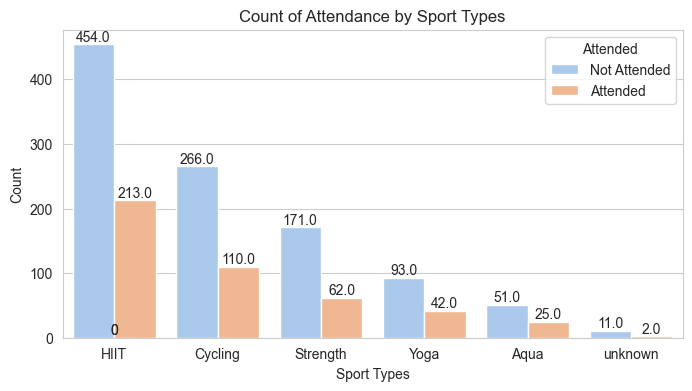

In [25]:
# Count of the Attendance by Sport Types
sport_type_counts = fitnessclub['sport_type'].value_counts().reset_index()
sport_type_counts.columns = ['sport_type', 'count']
sport_type_counts = sport_type_counts.sort_values(by='count', ascending=False)

plt.figure(figsize =(8,4))
# Create the countplot
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.countplot(data=fitnessclub, hue='attended', x='sport_type', order=sport_type_counts['sport_type'])

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Sport Types')
plt.ylabel('Count')
plt.title('Count of Attendance by Sport Types')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show()

-  As a fitness club, gym exercises helping lose weight most effectively - **HIIT (High intensive interval training) is the most attractive among members, with nearly 700 registers.**
-  **Cycling and Strength training follow in 2nd and 3rd position**, having 376 and 233 members respectively. AquaFit, the new sport type, is not popular, just being booked by half compared with Yoga, a sport with mental relief. 

<Figure size 1200x400 with 0 Axes>

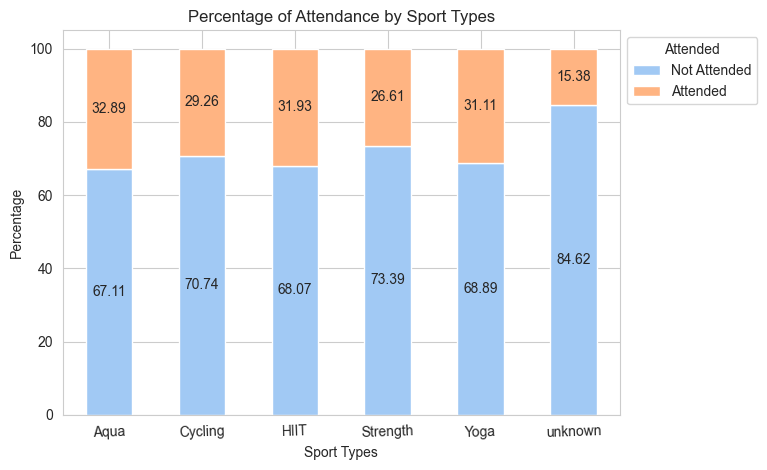

In [26]:
pct = round(pd.crosstab(fitnessclub['sport_type'], fitnessclub['attended'], normalize='index') * 100,2)

# Create a stacked bar 
plt.figure(figsize=(12, 4))
ax = pct.plot(kind='bar', stacked=True)
plt.xlabel('Sport Types')
plt.ylabel('Percentage')
plt.title('Percentage of Attendance by Sport Types')
plt.xticks(rotation=2)
plt.tight_layout()
plt.legend(title='Attended', labels=['Not Attended', 'Attended'], bbox_to_anchor=(1, 1))

# Label the segments of the stacked bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.show()


- Despite high booking, the **conversion rate of this club is alarming**. There is also an **imbalance in attendance distribution among diferent sport types.**
- In particular, the ratio between absence and attendance of Aqua, HIIT and Yoga is nearly the same, which is around 2:1. 
- That rate in Cycling and Strength training is more concerning, with over 70% of not attending.

##### **Attendance Based on Day of Week**

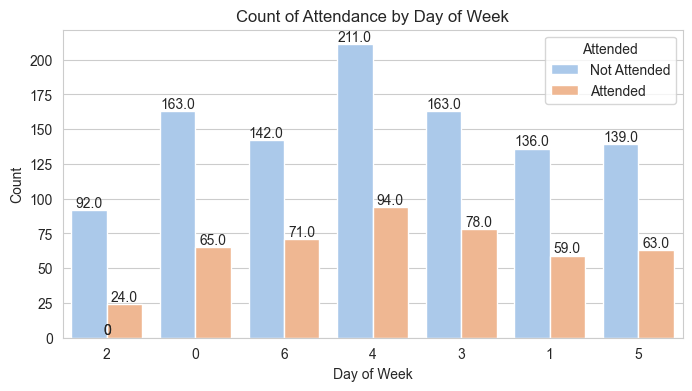

In [27]:
# Count the attendance by day of the week
day_of_week_counts = fitnessclub['day_of_week'].value_counts()

# Create the countplot
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.countplot(x="day_of_week",hue="attended",data=fitnessclub,order=fitnessclub["day_of_week"].unique())

# Add data labels to the bars
for p in ax.patches:ax.annotate(f"{p.get_height()}",(p.get_x() + p.get_width() / 2., p.get_height()),ha="center",va="bottom",)

plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title("Count of Attendance by Day of Week")
plt.legend(title="Attended", labels=["Not Attended", "Attended"])
plt.show()

- **The number of members registering for and coming to classes reaches the peak on Friday** (305 bookings and 94 attendees). **Members of GoalZ Fitness Club also have a favor on Thursday for relaxing and exercising.** There are nearly 80 gym-goers on this day with over 240 booking orders. The number of those who are absent is the same (163) for the first day of week, but the data on attendees is a bit lower when compared to Thursday's, standing at 66.

- **By contrast, the middle of week (Tuesday and Wednesday) seems to be busy with the members of the club.** In particular, 195 members book on Tuesday and 78 of them attend. Moving onto Wednesday,  both these data fall significantly, by over 1.5 times for booking orders (to 116) and 3 times for participants (only 24 ones).

- **In terms of the weekends (Saturday and Sunday), both the numbers are nearly aligned with the other**, around 140 membera away from registered classes and a half coming as committed.

<Figure size 1200x400 with 0 Axes>

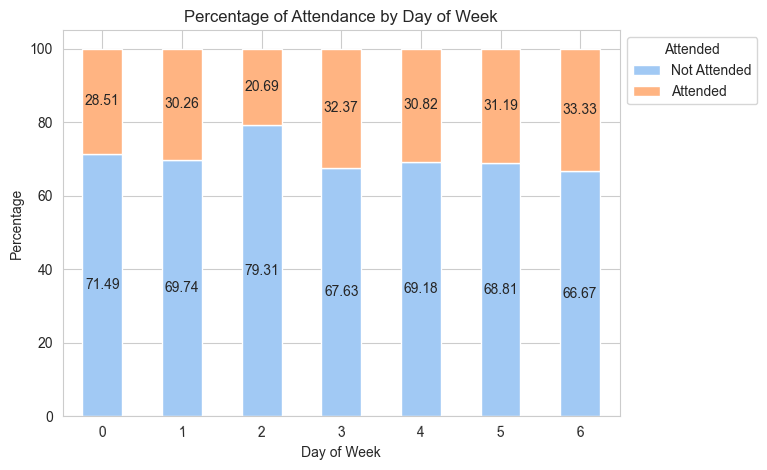

In [28]:
pct = round(pd.crosstab(fitnessclub['day_of_week'], fitnessclub['attended'], normalize='index') * 100,2)

# Create a stacked bar 
plt.figure(figsize=(12, 4))
ax = pct.plot(kind='bar', stacked=True)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Percentage of Attendance by Day of Week')
plt.xticks(rotation=2)
plt.tight_layout()
plt.legend(title='Attended', labels=['Not Attended', 'Attended'], bbox_to_anchor=(1, 1))

# Label the segments of the stacked bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)
sns.set_palette('pastel')
sns.set_style('whitegrid')
plt.show()


- **Wednesday is truly the gloomiest day.** Beside the lowest booking and attendance, the conversion rate on that day worries the club the most, **with the percentage of those who miss their classes (~80%) is 4 times as high as that of going as booked.**

- **The ratio between not coming and coming for the other days is almost the same, at around 2:1 (~68% away).**

##### **Attendance Based on Month as Member, Weight, and Days Before**

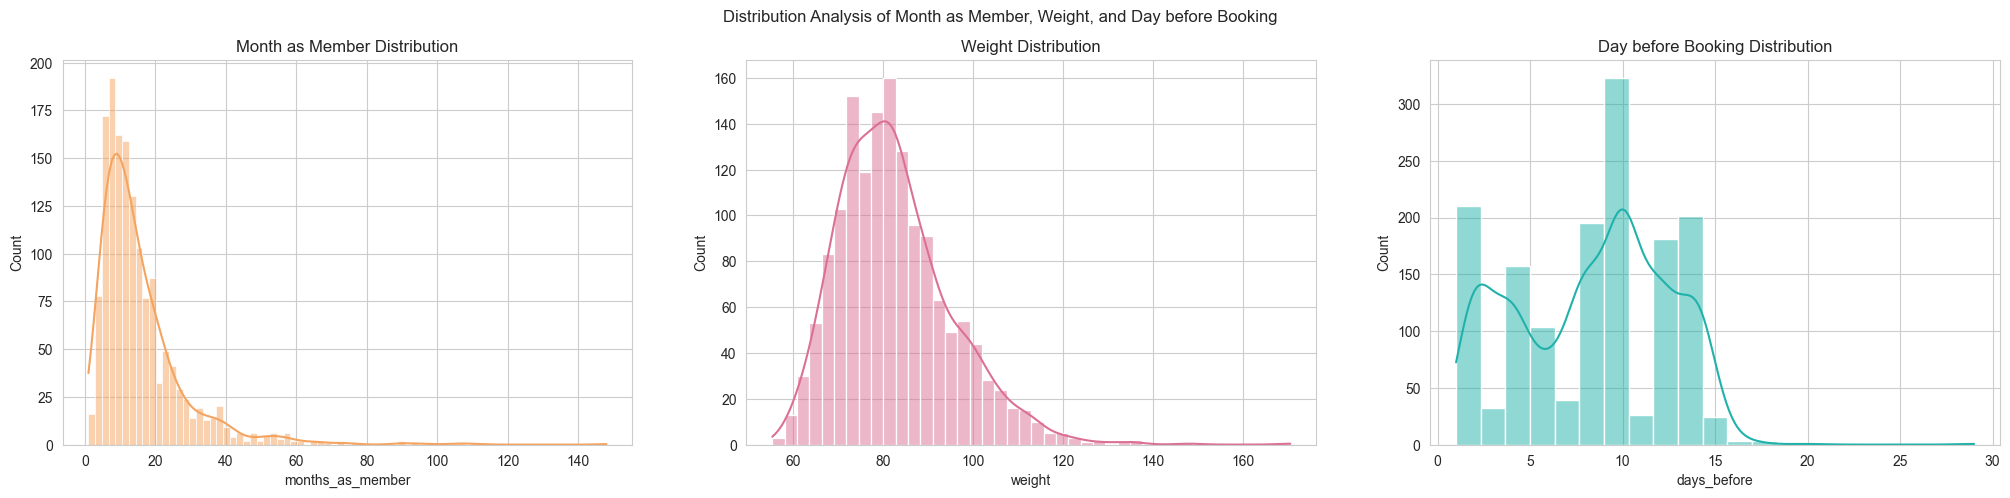

In [29]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 3, figsize=(25,5))

sns.histplot(data=fitnessclub, x='months_as_member', kde=True, ax=axs[0], color = 'sandybrown')
sns.histplot(data=fitnessclub, x='weight', kde=True, ax=axs[1], color = 'palevioletred')
sns.histplot(data=fitnessclub, x='days_before', kde=True, ax=axs[2], color = 'lightseagreen')

# Set the titles of the plots
axs[0].set_title('Month as Member Distribution')
axs[1].set_title('Weight Distribution')
axs[2].set_title('Day before Booking Distribution')
fig.suptitle('Distribution Analysis of Month as Member, Weight, and Day before Booking')

plt.show()

- **Month as Member:** The distriution is skewed towards the right, indicating the presence of outliers. Since the dataset is small, post applying  a log transformation, we can see the distribution is close to normally distributed dataset
- **Weight:** The distribution is quite normal.

##### **Correlation between different features**

Text(0.5, 1.02, 'Pair Plot for Multiple Metrics')

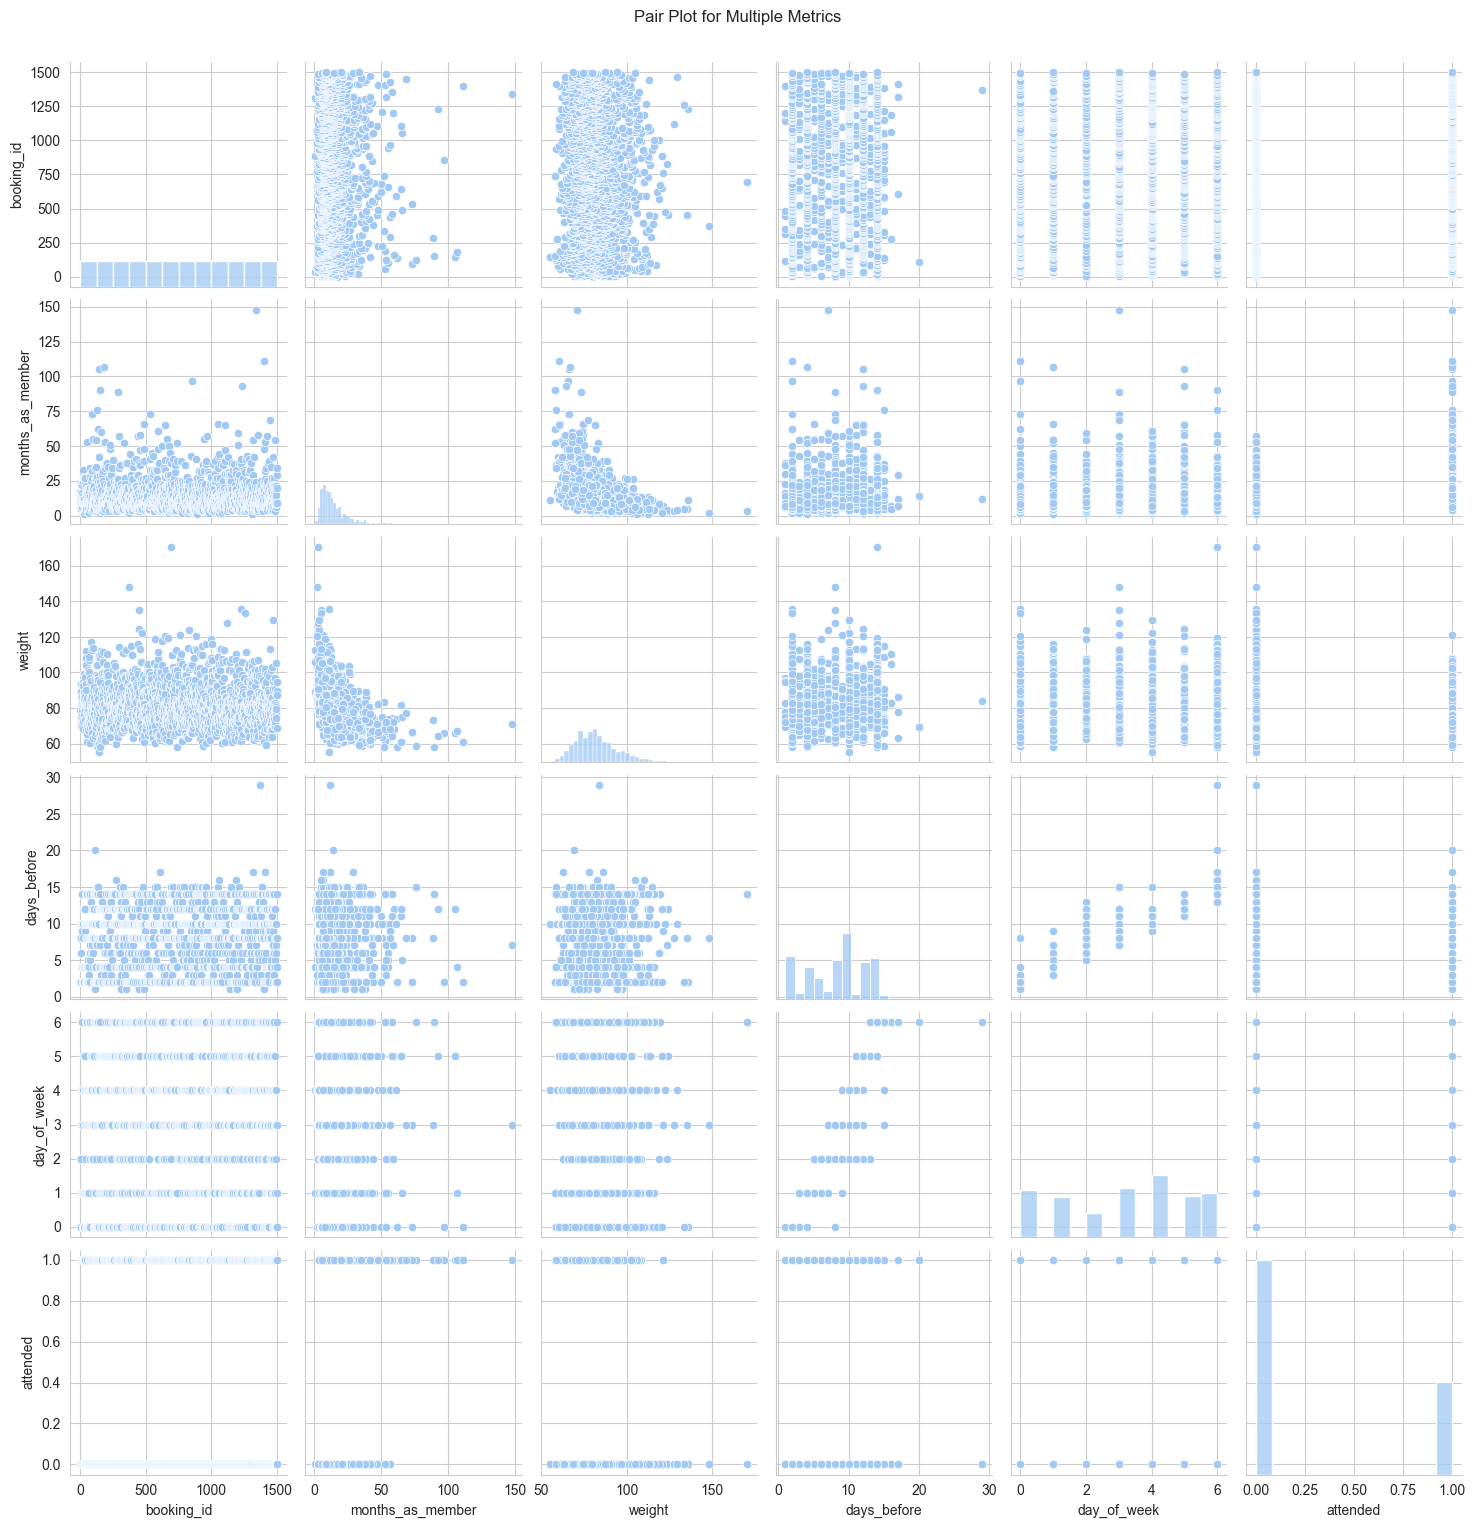

In [30]:
sns.pairplot(fitnessclub)
plt.suptitle('Pair Plot for Multiple Metrics', y=1.02)

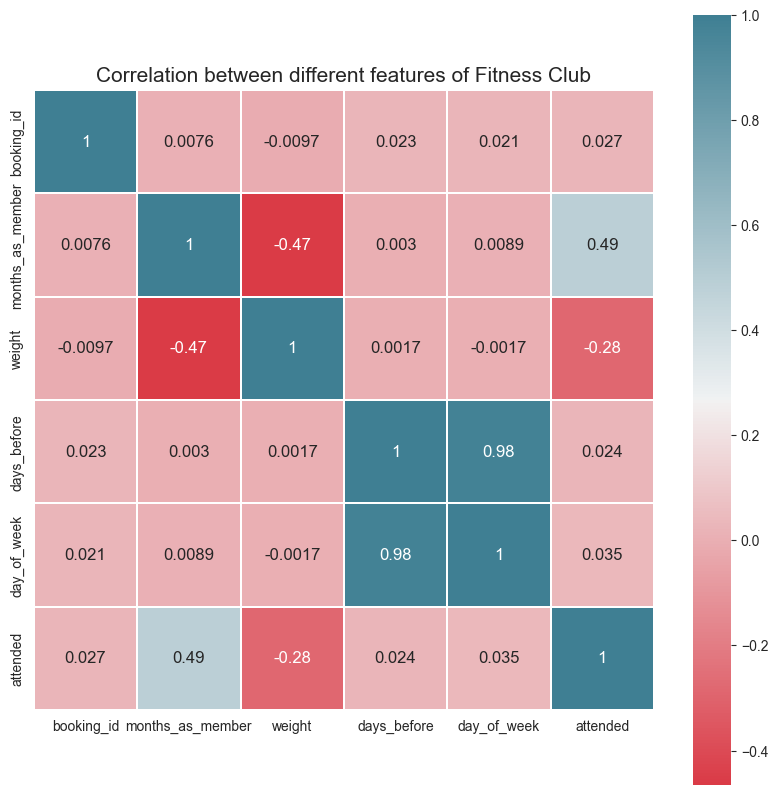

In [32]:
numeric_fitnessclub = fitnessclub.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
plt.title('Correlation between different features of Fitness Club', size=15)

colormap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(numeric_fitnessclub.corr(),
            cmap=colormap,
            square=True,
            annot=True,
            linewidths=0.1,
            vmax=1.0,
            linecolor='white',
            annot_kws={'fontsize': 12})
plt.show()

##### **Attendance Rate by Months as Member**

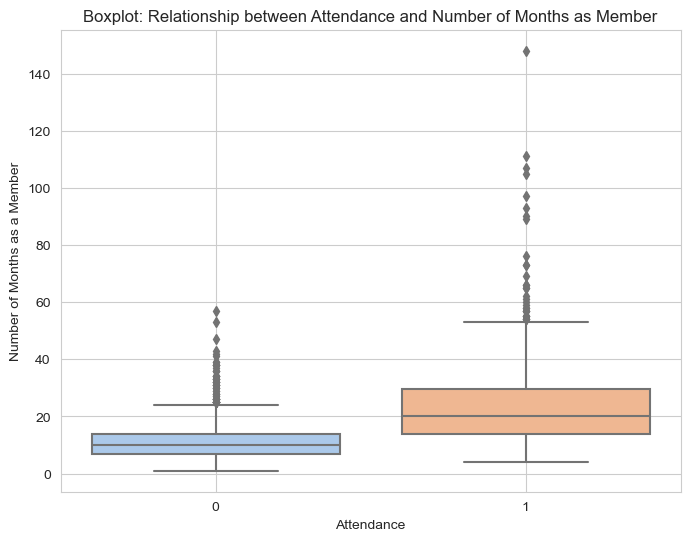

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_palette('pastel')
sns.boxplot(data=fitnessclub, x='attended', y='months_as_member', orient='v')
plt.ylabel('Number of Months as a Member')
plt.xlabel('Attendance')
plt.title('Boxplot: Relationship between Attendance and Number of Months as Member')
plt.grid(True)
plt.show()

##### Outliers Removing

In [ ]:
Q1 = fitnessclub['months_as_member'].quantile(0.25)
Q3 = fitnessclub['months_as_member'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


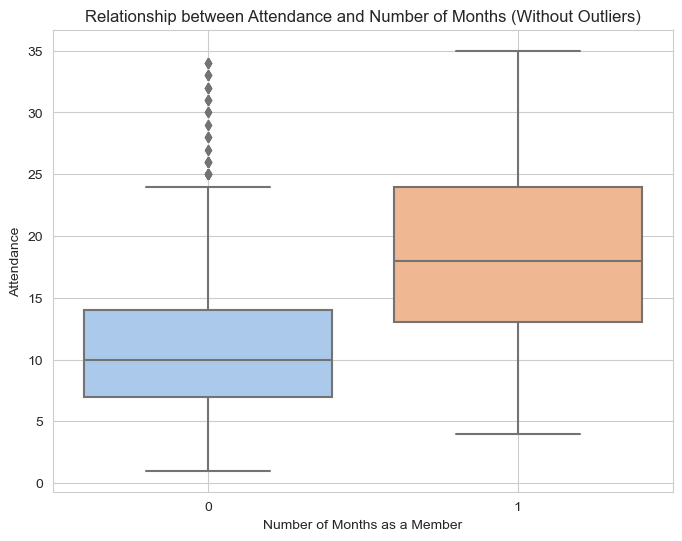

In [ ]:
# Filter out outliers
fitnessclub1 = fitnessclub[(fitnessclub['months_as_member'] >= lower_bound) & (fitnessclub['months_as_member'] <= upper_bound)]

# Create a boxplot plot for the filtered data

plt.figure(figsize=(8, 6))
sns.boxplot(data=fitnessclub1, x='attended', y='months_as_member', orient='v')
plt.xlabel('Number of Months as a Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Number of Months (Without Outliers)')
plt.grid(True)
plt.show()

In [ ]:
fitnessclub1['months_as_member'].describe()

count    1397.000000
mean       13.006442
std         7.247811
min         1.000000
25%         7.000000
50%        11.000000
75%        17.000000
max        35.000000
Name: months_as_member, dtype: float64

In [ ]:
months_as_member1 = fitnessclub1.groupby('attended')['months_as_member']
months_as_member1.describe()

,count,mean,std,min,25%,50%,75%,max
attended,,,,,,,,
0,1030.0,11.034951,6.148846,1.0,7.0,10.0,14.0,34.0
1,367.0,18.539510,7.240818,4.0,13.0,18.0,24.0,35.0


**Insights abour Relationship betweeen Attendance and Number of month as member:**

- **The distribution of months as member group by attendance = 0 is right-skewed** with:
    - The length of the box from lower interquartile (Q1) to the median is smaller than that from median to the upper one 
    - The length of the second whisker (3rd quartile to max) is substantially larger than that of the first one (min to 1st quartile).
    - Wide range of data distribution and exceptionally high characteristic values (outliers) **push the arithmetic mean away from the center position towards the long tail** and increase the standard deviation, which gives the impression of a wide variability in medical cost.
    
Meanwhile, **the distribution of months as member group by attendance = 1 (after removing outliers) is normal:** with the median and mean approximately equal.

- **Absent Group: attended = 0:**
    - The attendance rate of members who have lower than 4 months participation equals 0 percent.
    - 50% of absent people have 7 to 14 months as the fitness club members. 
    - The data ranges widely from 1 to 34 months with number of various exceptionally high characteristic values (outliers)

- **Attended Group: attended = 1:**
    - Since the data is normal distributed, it can be suggested that 95% of attended people have 4 (mean - 2.std) to 32.9 (mean + 2.std) months as fitness club members, in which 50% of attendance in the range of 13-24 months.
    - The typical number of months as member for better attendance rate is 18 (mean ~ median)

## **III. ML: Logistic Regression Model vs Random Forest Classifier**
### **1. Data Preparing**

The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

**Choice of Model:** This is a classification problem, a classification Model will be used

In order to do Modeling, we will need data pre-processing. Below changes were done:-

- Convert all the Object variables into numeric variables using Get dummies for- category & time
- Removed the outliers where the value were beyond 1.5*IQR


In [ ]:
fitnessclub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1397 non-null   int64  
 1   months_as_member  1397 non-null   int64  
 2   weight            1397 non-null   float64
 3   days_before       1397 non-null   int32  
 4   day_of_week       1397 non-null   int64  
 5   time              1397 non-null   object 
 6   sport_type        1397 non-null   object 
 7   attended          1397 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 92.8+ KB


In [ ]:
fitnessclub1 = pd.get_dummies(fitnessclub1, columns=['sport_type', 'time'],drop_first=True)
fitnessclub1

,booking_id,months_as_member,weight,days_before,day_of_week,attended,sport_type_Cycling,sport_type_HIIT,sport_type_Strength,sport_type_Yoga,sport_type_unknown,time_PM
0,1,17,79.56,8,2,0,0,0,1,0,0,1
1,2,10,79.01,2,0,0,0,1,0,0,0,0
2,3,16,74.53,14,6,0,0,0,1,0,0,0
3,4,5,86.12,10,4,0,1,0,0,0,0,0
4,5,15,69.29,8,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,4,0,0,1,0,0,0,0
1496,1497,29,89.55,2,0,0,0,0,1,0,0,0
1497,1498,9,87.38,4,1,0,0,1,0,0,0,0
1498,1499,34,68.64,14,6,0,0,0,0,0,0,0


In [ ]:
# Copy all the predictor variables into X dataframe
X = fitnessclub1.drop('attended', axis=1)  #df1 is the dataframe post pre-processing
# Copy target into the y dataframe. 
y = fitnessclub1[['attended']]


In [ ]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics

### **2. Training Model**
#### **Logistic Regression Classifier**


In [ ]:
# Split dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **Random Forest Classifier**

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Why we chose the models?

- Logistic Regression model: its simplicity, efficiency in training, and ease of interpretation.

- As a comparison with Logistic Regression Model, we have decided to implement the Random Forest model. This choice is driven by the Random Forest's capability to capture intricate relationships between input features and target variables, making it well-suited for handling more complex data patterns.

### **3. Model Evaluation Parameters**

Based on the specific task of predicting attendance in fitness classes, We have considered Precision, Recall, and F1-Score.

Precision, Recall, and F1-Score are essential evaluation metrics, especially when dealing with imbalanced classes


0.7857142857142857


<Axes: >

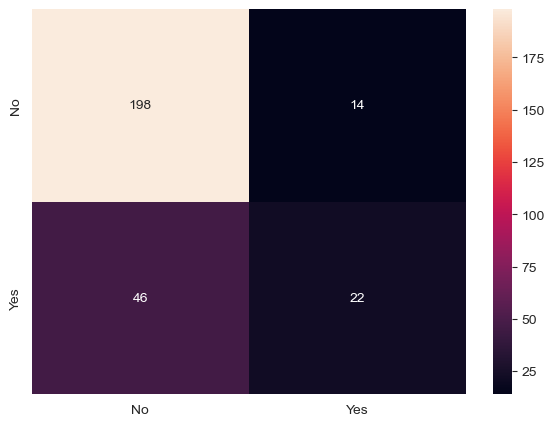

In [ ]:
#For Logistic Regression Classifier
y_predict = regression_model.predict(X_test)
print(regression_model.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g') #the rows typically represent the true labels, while the columns represent the predicted labels. 


In [ ]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

## Precision: Proportion of positive predictions that are correct => Accuracy of positive predictions 
# (trong số các positive prediction thì đoán đúng bao nhiêu phần trăm?)
## Recall: Proportion of actual positive cases that are correctly identified => Ability to capture all positive instances
# (trong đống real positive event thì đã "bắt được" bao nhiêu event (phần trăm?)?)

Precision: 0.6111111111111112
Recall: 0.3235294117647059
F1-Score: 0.42307692307692313


0.7285714285714285


<Axes: >

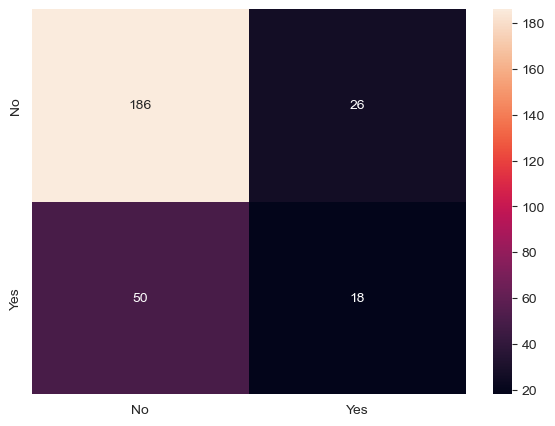

In [ ]:
#For Random Forrest Classifier
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g') #the rows typically represent the true labels, while the columns represent the predicted labels. 


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.4090909090909091
Recall: 0.2647058823529412
F1-Score: 0.3214285714285714


**Summary of Random Forest Model Evaluation:**
- **Accuracy:** 72.8%
- **Precision (Attendance Prediction):** 0.4090909090909091:
- **Recall (Identifying Actual Attendees):** 0.2647058823529412:
- **F1-Score (Balance of Precision and Recall):** 0.3214285714285714:

**Comment:** 
- Based on the provided metrics, **the model's performance is moderate.** 
- While the precision is relatively good, the recall is somewhat low. This suggests that the model is able to identify some of the positive cases accurately, but it misses a significant portion of them. 
- F1-score suggest that this is a harmonic mean of precision and recall, which means that it gives equal weight to both metrics. The model is able to correctly identify some of the positive instances, but it is not very accurate or complete.

**Selection for Future Prediction**

- Considering attendance prediction, Logistic Regression performs better.
- It shows higher accuracy, better Precision, Recall, and F1-Score.
- Logistic Regression is recommended for predicting future attendance.

## **IV. Conclusion**

- Despite being a long-standing Fitness Club, GoalZ in general has a low attendance rate, at around one-third. HIIT is the most famous among members and Friday is their favorite choice of classes. Members with less than 4 months associating with the club have exactly 0 attendance rate. Meanwhile, from 18 months of being a member, the rate is acceptable. 

- In order not to waste resources for low-number-of-student classes and increase profits, the club needs to take action to improve the attendance rate of Cycling and Strength training (70% absence) as well as classes on Wednesday (80% away). Besides that, the club should give more promotions for members who stay with it for over a month.

- We suggest using a Logistic Regression Classifier to better predict the possibility each member will attend their classes after booking based on different features.